In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
import statsmodels.api as sm

In [2]:
# import dataset
dataset = pd.read_csv('airline_passengers.csv')
dataset.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.shape

(144, 2)

In [4]:
dataset.tail()

,Month,Thousands of Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
from numpy import log
from datetime import datetime

In [6]:
dataset['Month'] = pd.to_datetime(dataset['Month'])

In [7]:
dataset.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
dataset.set_index('Month', inplace=True)

In [9]:
dataset.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

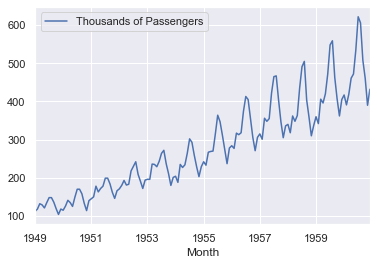

In [10]:
dataset.plot()

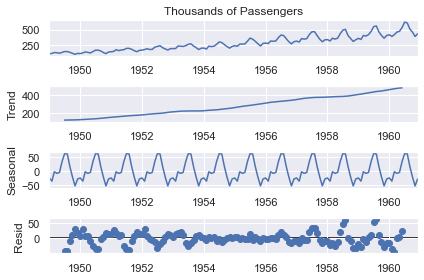

In [13]:
# Decomposition method to check dataset component

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dataset['Thousands of Passengers'],period = 12)
decomposition.plot()
plt.show()

In [14]:
sm.stats.durbin_watson(dataset)
# Yes, we found autocorrelation

array([0.0121528])

In [16]:
# Your time series data should be "Stationary"
# How will check - Augmented Dickey Fuller Test

from statsmodels.tsa.stattools import adfuller
adfuller(dataset['Thousands of Passengers'])

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [17]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test")
    labels = ['ADF Test Statistics','p-value','#Lags','No. of Observation']
    
    for a , b in zip(result, labels):
        print(b + " : " + str(a))
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my timeseries is Stationary")
    else:
        print("Weak evidence against null hypothesis and my timeseries is non-stationary")    

In [18]:
adf_check(dataset['Thousands of Passengers'])

Augmented Dickey Fuller Test
ADF Test Statistics : 0.8153688792060543
p-value : 0.9918802434376411
#Lags : 13
No. of Observation : 130
Weak evidence against null hypothesis and my timeseries is non-stationary


In [19]:
# in case we have non-stationary time series data then we have to make it stationary by the help of lag function
dataset['1st Diff'] = dataset['Thousands of Passengers']-dataset['Thousands of Passengers'].shift(1)

In [20]:
dataset.head(20)

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
1949-07-01,148,13.0
1949-08-01,148,0.0
1949-09-01,136,-12.0


In [22]:
adf_check(dataset['1st Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -2.8292668241700034
p-value : 0.054213290283824954
#Lags : 12
No. of Observation : 130
Weak evidence against null hypothesis and my timeseries is non-stationary


In [24]:
dataset['2nd Diff'] = dataset['1st Diff'] - dataset['1st Diff'].shift(1)

In [25]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
1949-08-01,148,0.0,-13.0
1949-09-01,136,-12.0,-12.0


In [26]:
adf_check(dataset['2nd Diff'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -16.384231542468488
p-value : 2.7328918500143186e-29
#Lags : 11
No. of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [ ]:
# AIC = -2LL + 2K
# K = Parameter (pdq - Trend and PDQ - Seasonality)
# p/P - partial autocorrelation (AutoRegressive method)
# d/D - Lag Difference(Integrated method) - in case we have non-stationary data
# q/Q - AutoCorrelation (Moving Avg)
# ARIMA - AutoRegressive Integrated Moving Avg
# p = ?
# d = 2
# q = ?

# P = ?
# D = ?
# Q = ?

In [27]:
dataset['Seasonality'] = dataset['Thousands of Passengers'] - 
                                dataset['Thousands of Passengers'].shift(12)

In [28]:
dataset.head(20)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [29]:
adf_check(dataset['Seasonality'].dropna())

Augmented Dickey Fuller Test
ADF Test Statistics : -3.3830207264924805
p-value : 0.011551493085514982
#Lags : 1
No. of Observation : 130
Strong evidence against null hypothesis and my timeseries is Stationary


In [ ]:
# d = 2
# D = 1

# p/P and q/Q = ?

